In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn import model_selection
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
# from sklearn.datasets import load_

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
boston

{'DESCR': "Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [4]:
boston.data.shape

(506, 13)

In [5]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='<U7')

In [6]:
boston.target

array([ 24. ,  21.6,  34.7,  33.4,  36.2,  28.7,  22.9,  27.1,  16.5,
        18.9,  15. ,  18.9,  21.7,  20.4,  18.2,  19.9,  23.1,  17.5,
        20.2,  18.2,  13.6,  19.6,  15.2,  14.5,  15.6,  13.9,  16.6,
        14.8,  18.4,  21. ,  12.7,  14.5,  13.2,  13.1,  13.5,  18.9,
        20. ,  21. ,  24.7,  30.8,  34.9,  26.6,  25.3,  24.7,  21.2,
        19.3,  20. ,  16.6,  14.4,  19.4,  19.7,  20.5,  25. ,  23.4,
        18.9,  35.4,  24.7,  31.6,  23.3,  19.6,  18.7,  16. ,  22.2,
        25. ,  33. ,  23.5,  19.4,  22. ,  17.4,  20.9,  24.2,  21.7,
        22.8,  23.4,  24.1,  21.4,  20. ,  20.8,  21.2,  20.3,  28. ,
        23.9,  24.8,  22.9,  23.9,  26.6,  22.5,  22.2,  23.6,  28.7,
        22.6,  22. ,  22.9,  25. ,  20.6,  28.4,  21.4,  38.7,  43.8,
        33.2,  27.5,  26.5,  18.6,  19.3,  20.1,  19.5,  19.5,  20.4,
        19.8,  19.4,  21.7,  22.8,  18.8,  18.7,  18.5,  18.3,  21.2,
        19.2,  20.4,  19.3,  22. ,  20.3,  20.5,  17.3,  18.8,  21.4,
        15.7,  16.2,

In [7]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [8]:
df = pd.DataFrame(boston.data)
df.shape

(506, 13)

In [9]:
df.head()

0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33

In [10]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='<U7')

In [11]:
df.columns = boston.feature_names
df.head(10)

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622  3.0  222.0   
5  0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622  3.0  222.0   
6  0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605  5.0  311.0   
7  0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505  5.0  311.0   
8  0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821  5.0  311.0   
9  0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921  5.0  311.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
5     18.7  394.12   5.21  
6     15.2  395.60  12.43  
7     15.2  396.90  19.15  
8     15.2  386.63  29.93  
9     15.2  386.71  17.10

In [12]:
df['HOUSING_VALUE'] = boston.target
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  HOUSING_VALUE  
0     15.3  396.90   4.98           24.0  
1     17.8  396.90   9.14           21.6  
2     17.8  392.83   4.03           34.7  
3     18.7  394.63   2.94           33.4  
4     18.7  396.90   5.33           36.2

In [13]:
df.isnull().sum()

CRIM             0
ZN               0
INDUS            0
CHAS             0
NOX              0
RM               0
AGE              0
DIS              0
RAD              0
TAX              0
PTRATIO          0
B                0
LSTAT            0
HOUSING_VALUE    0
dtype: int64

In [14]:
df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.593761   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.596783   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.647423   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT  HOUSING_VALUE  
count  506.000000     506.000000  
mean    12.653063      22.532806  
std      7.141062       9.197104  
min      1.730000       5.000000  
25%      6.950000      17.025000  
50%     11.360000      21.200000  
75%     16.955000      25.000000  
max     37.970000      50.000000

In [15]:
x_train = df.drop(['HOUSING_VALUE'], axis=1)
y_train = df['HOUSING_VALUE']

In [16]:
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(x_train,y_train,test_size=0.3,random_state=42)
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(354, 13)
(354,)
(152, 13)
(152,)


In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(n_jobs = -1)
model.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [18]:
print(model.intercept_)
print(model.coef_)

31.6821485821
[ -1.32774155e-01   3.57812335e-02   4.99454423e-02   3.12127706e+00
  -1.54698463e+01   4.04872721e+00  -1.07515901e-02  -1.38699758e+00
   2.42353741e-01  -8.69095363e-03  -9.11917342e-01   1.19435253e-02
  -5.48080157e-01]


In [19]:
print(df.columns.values.tolist())

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'HOUSING_VALUE']


In [20]:
list(zip(df.columns,model.coef_))

[('CRIM', -0.132774155037963),
 ('ZN', 0.035781233480186761),
 ('INDUS', 0.049945442282816055),
 ('CHAS', 3.1212770590467467),
 ('NOX', -15.469846273232342),
 ('RM', 4.0487272075820551),
 ('AGE', -0.010751590104697062),
 ('DIS', -1.3869975825236405),
 ('RAD', 0.24235374106306862),
 ('TAX', -0.0086909536300314727),
 ('PTRATIO', -0.91191734241737099),
 ('B', 0.011943525262172683),
 ('LSTAT', -0.54808015683455569)]

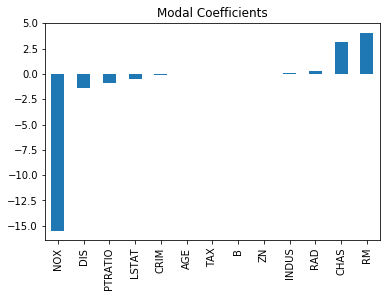

In [21]:
# checking the magnitude of coefficients
predictors = df.columns[:-1]
coef = pd.Series(model.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

In [22]:
predictors = df.columns[:-1]
pd.Series(model.coef_,predictors).sort_values()

NOX       -15.469846
DIS        -1.386998
PTRATIO    -0.911917
LSTAT      -0.548080
CRIM       -0.132774
AGE        -0.010752
TAX        -0.008691
B           0.011944
ZN          0.035781
INDUS       0.049945
RAD         0.242354
CHAS        3.121277
RM          4.048727
dtype: float64

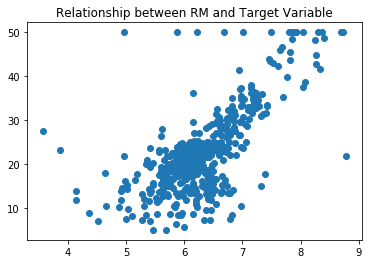

In [22]:
plt.scatter(df.RM,df.HOUSING_VALUE)
plt.title("Relationship between RM and Target Variable")
plt.show()

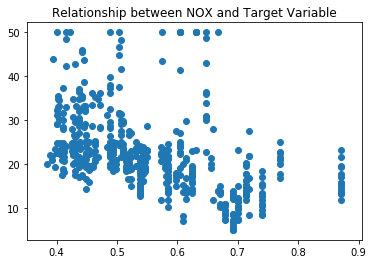

In [23]:
plt.scatter(df.NOX,df.HOUSING_VALUE)
plt.title("Relationship between NOX and Target Variable")
plt.show()

In [24]:
print('R2 Value/Coefficient of Determination: {}'.format(model.score(xtest, ytest)))

R2 Value/Coefficient of Determination: 0.7109203586326318


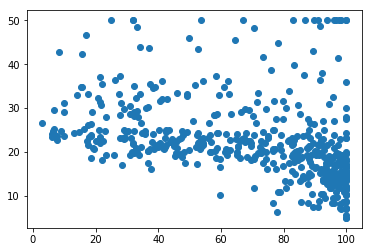

In [25]:
plt.scatter(df.AGE,df.HOUSING_VALUE)

In [26]:
model.predict(xtest)

array([ 28.65507152,  36.50208976,  15.41877538,  25.4123428 ,
        18.84504144,  23.15193132,  17.39045794,  14.07068504,
        23.04106392,  20.5997909 ,  24.82848981,  18.52972656,
        -6.89338718,  21.80647623,  19.23044706,  26.18284059,
        20.28099565,   5.61147028,  40.44518211,  17.57213704,
        27.44750834,  30.17592819,  10.92939394,  24.0192381 ,
        18.06277152,  15.93524273,  23.13784817,  14.49181123,
        22.33889889,  19.32732276,  22.1740459 ,  25.19724098,
        25.31414125,  18.51391365,  16.60898647,  17.48281643,
        30.95248869,  20.19196715,  23.90566388,  24.87331497,
        13.93612301,  31.82414012,  42.56492347,  17.62944481,
        27.02392519,  17.1891161 ,  13.79929973,  26.10739476,
        20.31403576,  30.09296805,  21.31686534,  34.1606385 ,
        15.59905068,  26.11282476,  39.31618827,  22.99094172,
        18.95021816,  33.05721471,  24.85373006,  12.91490043,
        22.67333429,  30.795732  ,  31.63743635,  16.28

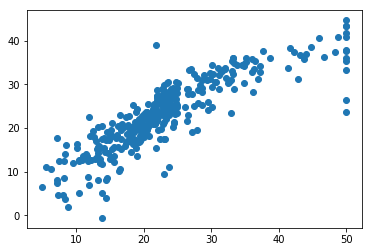

In [27]:
plt.scatter(ytrain,model.predict(xtrain))

In [28]:
print(sqrt(mean_squared_error(ytrain, model.predict(xtrain))))

4.748187100234741


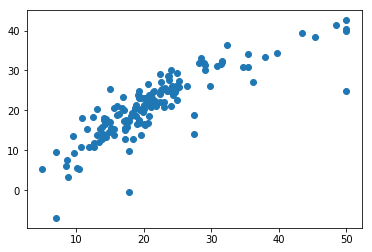

In [29]:
plt.scatter(ytest,model.predict(xtest))

In [30]:
print(sqrt(mean_squared_error(ytest, model.predict(xtest))))

4.64114414168871


In [31]:
pd.DataFrame({'Actual': ytest, 'Predicted': model.predict(xtest)}).head(10)

Actual  Predicted
173    23.6  28.655072
274    32.4  36.502090
491    13.6  15.418775
72     22.8  25.412343
452    16.1  18.845041
76     20.0  23.151931
316    17.8  17.390458
140    14.0  14.070685
471    19.6  23.041064
500    16.8  20.599791